# Linear Regression Assignment 

## Importing the required libraries and functions

In [876]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [877]:
bike_ds = pd.read_csv('day.csv')

In [878]:
bike_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Performing EDA

In [879]:
# Dropping the instant column as it is an index and cannot be used as a predictor
bike_ds.drop('instant', axis = 1, inplace = True)

In [880]:
bike_ds['dteday'] = pd.to_datetime(bike_ds['dteday'], dayfirst = True)

In [881]:
# function to decode season
def season_decoding(x):
    season_num = x['season']
    season = ''
    
    if (season_num == 1):
        season = 'spring'
    elif (season_num == 2):
        season = 'summer'
    elif (season_num == 3):
        season = 'fall'
    elif (season_num == 4):
        season = 'winter'
    
    return season

In [882]:
# Removing the encoding from 'season'
bike_ds['season'] = bike_ds.apply(season_decoding, axis = 1)
bike_ds.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [883]:
# function to decode 'mnth'
def month_decoding(x):
    month_num = x['mnth']
    month = ''
    
    if (month_num == 1):
        month = '01_Jan'
    elif (month_num == 2):
        month = '02_Feb'
    elif (month_num == 3):
        month = '03_Mar'
    elif (month_num == 4):
        month = '04_Apr'
    elif (month_num == 5):
        month = '05_May'
    elif (month_num == 6):
        month = '06_Jun'
    elif (month_num == 7):
        month = '07_Jul'
    elif (month_num == 8):
        month = '08_Aug'
    elif (month_num == 9):
        month = '09_Sep'
    elif (month_num == 10):
        month = '10_Oct'
    elif (month_num == 11):
        month = '11_Nov'
    elif (month_num == 12):
        month = '12_Dec'
        
    return month

In [884]:
# Removing the encoding from 'mnth'
bike_ds['mnth'] = bike_ds.apply(month_decoding, axis = 1)
bike_ds.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,01_Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,01_Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,01_Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,01_Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,01_Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [885]:
# Removing the encoding from 'yr'
bike_ds['yr'] = bike_ds['yr'].apply(lambda x: 2018 if x == 0 else 2019)
bike_ds.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,01_Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,2018,01_Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,2018,01_Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,2018,01_Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,2018,01_Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [886]:
# function to decode 'weekday'
def weekday_decoding(x):
    day_num = x['weekday']
    weekday = ''
    
    if day_num == 0:
        weekday = '2_Tue'
    elif day_num == 1:
        weekday = '3_Wed'
    elif day_num == 2:
        weekday = '4_Thu'
    elif day_num == 3:
        weekday = '5_Fri'
    elif day_num == 4:
        weekday = '6_Sat'
    elif day_num == 5:
        weekday = '7_Sun'
    elif day_num == 6:
        weekday = '1_Mon'
        
    return weekday

In [887]:
# Removing the encoding from 'weekday'
bike_ds['weekday'] = bike_ds.apply(weekday_decoding, axis = 1)
bike_ds.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,01_Jan,0,1_Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,2018,01_Jan,0,2_Tue,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,2018,01_Jan,0,3_Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,2018,01_Jan,0,4_Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,2018,01_Jan,0,5_Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


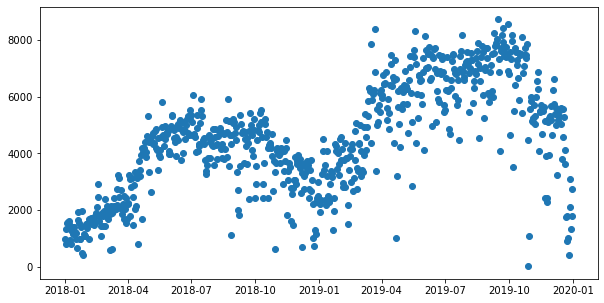

In [888]:
# Exploring the relation between 'dteday' and 'cnt'
plt_1 = plt.figure(figsize = (10, 5))
plt.scatter(bike_ds['dteday'], bike_ds['cnt'])
plt.show()

In [889]:
# There seems to be an increase in demand in both the years during the months of May to October
# Since we already have a column for the months, dropping the column for date
bike_ds.drop('dteday', axis = 1, inplace = True)
bike_ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,01_Jan,0,1_Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,01_Jan,0,2_Tue,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,01_Jan,0,3_Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,01_Jan,0,4_Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,01_Jan,0,5_Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [890]:
# function to decode 'weathersit'
def weathersit_decoding(x):
    weathersit = x['weathersit']
    weather = ''
    
    if weathersit == 1:
        weather = 'Clear'
    elif weathersit == 2:
        weather = 'Mist'
    elif weathersit == 3:
        weather = 'LightRain'
    elif weathersit == 4:
        weather = 'HeavyRain'
        
    return weather

In [891]:
# Removing the encoding from 'weathersit'
bike_ds['weathersit'] = bike_ds.apply(weathersit_decoding, axis = 1)
bike_ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,01_Jan,0,1_Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,01_Jan,0,2_Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,01_Jan,0,3_Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,01_Jan,0,4_Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,01_Jan,0,5_Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the distributions to get an idea of which predictors might be important

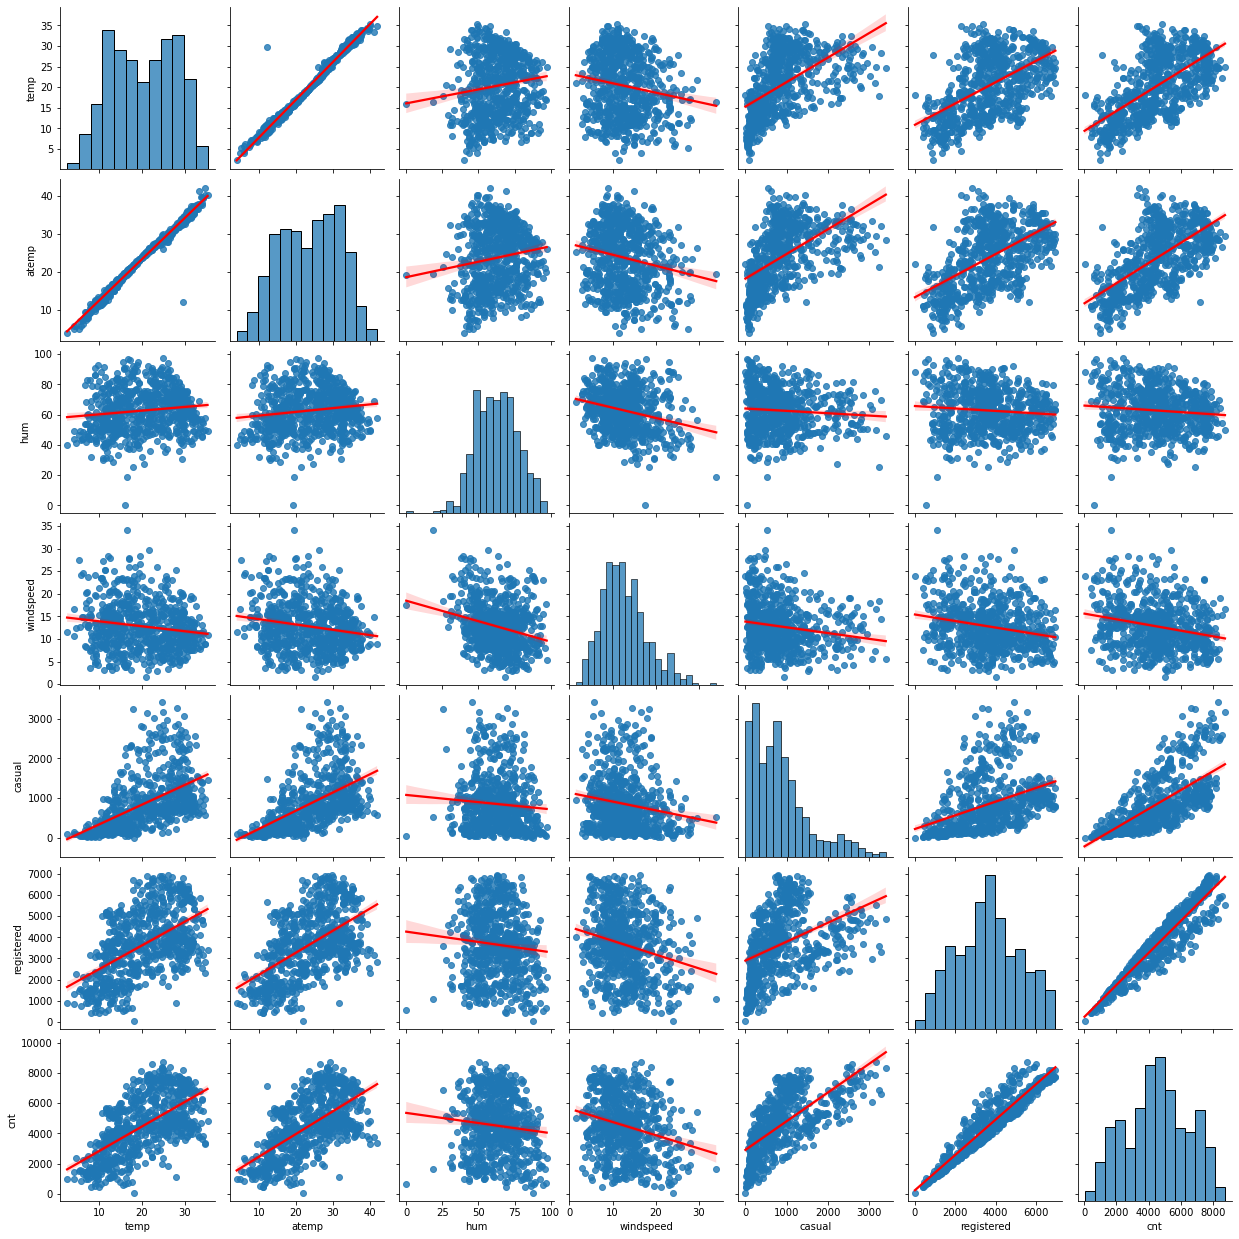

In [892]:
# Scatterplot to see the correlations
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(bike_ds[num_vars], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### Observations from the pairplot:
#####   - There is a positive correlation between cnt and temp and atemp.
#####   - As count increases, the number of registered and unregistered users increases. Which is more of an effect than a cause

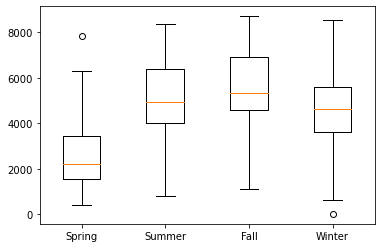

In [893]:
# Boxplot to see whether season determines demand
cnt_spring = bike_ds[bike_ds['season'] == 'spring']['cnt']
cnt_summer = bike_ds[bike_ds['season'] == 'summer']['cnt']
cnt_fall = bike_ds[bike_ds['season'] == 'fall']['cnt']
cnt_winter = bike_ds[bike_ds['season'] == 'winter']['cnt']
plt.boxplot([cnt_spring, cnt_summer, cnt_fall, cnt_winter])
plt.xticks((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'))
plt.show()

#### Observations from the boxplot:
##### - The demand is dependent on seasons. The demand peaks in Summer and Fall and then tapers off. The lowest is in winter.

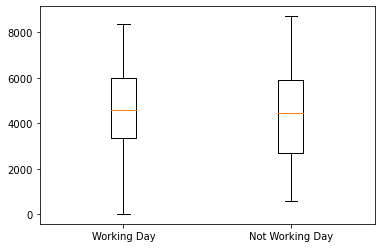

In [894]:
# Boxplot to see whether workingday determines demand
cnt_workday_yes = bike_ds[bike_ds['workingday'] == 1]['cnt']
cnt_workday_no = bike_ds[bike_ds['workingday'] == 0]['cnt']
plt.boxplot([cnt_workday_yes, cnt_workday_no])
plt.xticks((1, 2), ('Working Day', 'Not Working Day'))
plt.show()

#### Observations from the boxplot:
##### - The demand is not heaviliy dependent on whether its a working day or not. The median is about the same.

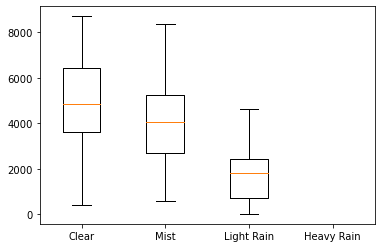

In [895]:
# Boxplot to see whether weathersit determines demand
cnt_clear = bike_ds[bike_ds['weathersit'] == 'Clear']['cnt']
cnt_mist = bike_ds[bike_ds['weathersit'] == 'Mist']['cnt']
cnt_lrain = bike_ds[bike_ds['weathersit'] == 'LightRain']['cnt']
cnt_hrain = bike_ds[bike_ds['weathersit'] == 'HeavyRain']['cnt']
plt.boxplot([cnt_clear, cnt_mist, cnt_lrain, cnt_hrain])
plt.xticks((1, 2, 3, 4), ('Clear', 'Mist', 'Light Rain', 'Heavy Rain'))
plt.show()

#### Observations from the boxplot:
##### - The demand is depandent on the weather.

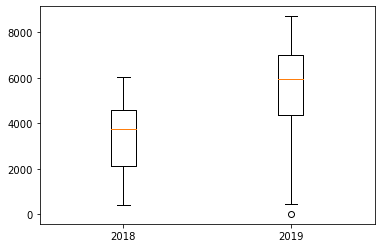

In [896]:
# Boxplot to see whether yr determines demand
cnt_2018 = bike_ds[bike_ds['yr'] == 2018]['cnt']
cnt_2019 = bike_ds[bike_ds['yr'] == 2019]['cnt']
plt.boxplot([cnt_2018, cnt_2019])
plt.xticks((1, 2), ('2018', '2019'))
plt.show()

#### Observations from the boxplot:
##### - The demand is increasing with the year.

In [897]:
# Adding dummy variable for 'mnth'
mnth = pd.get_dummies(bike_ds['mnth'])
mnth.drop('01_Jan', axis = 1, inplace = True)
bike_ds = pd.concat([bike_ds, mnth], axis = 1)
bike_ds.drop('mnth', axis = 1, inplace = True)
bike_ds

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
0,spring,2018,0,1_Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,2018,0,2_Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,2018,0,3_Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,2018,0,4_Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,2018,0,5_Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,0,6_Sat,1,Mist,10.420847,11.33210,65.2917,23.458911,...,0,0,0,0,0,0,0,0,0,1
726,spring,2019,0,7_Sun,1,Mist,10.386653,12.75230,59.0000,10.416557,...,0,0,0,0,0,0,0,0,0,1
727,spring,2019,0,1_Mon,0,Mist,10.386653,12.12000,75.2917,8.333661,...,0,0,0,0,0,0,0,0,0,1
728,spring,2019,0,2_Tue,0,Clear,10.489153,11.58500,48.3333,23.500518,...,0,0,0,0,0,0,0,0,0,1


In [898]:
# Adding dummy variable for 'weekday'
weekday = pd.get_dummies(bike_ds['weekday'])
weekday.drop('1_Mon', axis = 1, inplace = True)
bike_ds = pd.concat([bike_ds, weekday], axis = 1)
bike_ds.drop('weekday', axis = 1, inplace = True)
bike_ds

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,09_Sep,10_Oct,11_Nov,12_Dec,2_Tue,3_Wed,4_Thu,5_Fri,6_Sat,7_Sun
0,spring,2018,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,spring,2018,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,1,0,0,0,0,0
2,spring,2018,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,1,0,0,0,0
3,spring,2018,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,0,1,Mist,10.420847,11.33210,65.2917,23.458911,247,...,0,0,0,1,0,0,0,0,1,0
726,spring,2019,0,1,Mist,10.386653,12.75230,59.0000,10.416557,644,...,0,0,0,1,0,0,0,0,0,1
727,spring,2019,0,0,Mist,10.386653,12.12000,75.2917,8.333661,159,...,0,0,0,1,0,0,0,0,0,0
728,spring,2019,0,0,Clear,10.489153,11.58500,48.3333,23.500518,364,...,0,0,0,1,1,0,0,0,0,0


In [899]:
# Adding a dummy variable for 'season'
season = pd.get_dummies(bike_ds['season'])
season.drop('winter', axis = 1, inplace = True)
bike_ds = pd.concat([bike_ds, season], axis = 1)
bike_ds.drop('season', axis = 1, inplace = True)
bike_ds.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,12_Dec,2_Tue,3_Wed,4_Thu,5_Fri,6_Sat,7_Sun,fall,spring,summer
0,2018,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,1,0
1,2018,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,...,0,1,0,0,0,0,0,0,1,0
2,2018,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,1,0
3,2018,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,1,0,0,0,0,1,0
4,2018,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,1,0,0,0,1,0


In [900]:
# Adding a dummy variable for 'weathersit'
weathersit = pd.get_dummies(bike_ds['weathersit'], drop_first = True)
bike_ds = pd.concat([bike_ds, weathersit], axis = 1)
bike_ds.drop('weathersit', axis = 1, inplace = True)
bike_ds.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,3_Wed,4_Thu,5_Fri,6_Sat,7_Sun,fall,spring,summer,LightRain,Mist
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,1,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,1,0,0,0,0,0,1,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,1,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,1,0,0,0


In [901]:
# Dropping the column 'casual' as it is derived from 'cnt' and 'registered'
bike_ds.drop('casual', axis = 1, inplace = True)

In [902]:
bike_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   registered  730 non-null    int64  
 8   cnt         730 non-null    int64  
 9   02_Feb      730 non-null    uint8  
 10  03_Mar      730 non-null    uint8  
 11  04_Apr      730 non-null    uint8  
 12  05_May      730 non-null    uint8  
 13  06_Jun      730 non-null    uint8  
 14  07_Jul      730 non-null    uint8  
 15  08_Aug      730 non-null    uint8  
 16  09_Sep      730 non-null    uint8  
 17  10_Oct      730 non-null    uint8  
 18  11_Nov      730 non-null    uint8  
 19  12_Dec      730 non-null    u

In [903]:
# 'workingday' is closely related to 'holiday' and days of the week, and it is not significant
# 'atemp' is related to 'temp', 'hum', and 'windspeed'
# 'Month is closely related to season'
# 'registered' is not a cause since the registrations will not fluctuate day to day
# creating a subset of bike_ds which excludes these
sub_features = ['yr', 'atemp', 'fall', 'spring', 'summer', 'LightRain', 'Mist', 'cnt']

bike_ds_sub = bike_ds[sub_features]
bike_ds_sub.head()

,yr,atemp,fall,spring,summer,LightRain,Mist,cnt
0,2018,18.18125,0,1,0,0,1,985
1,2018,17.68695,0,1,0,0,1,801
2,2018,9.47025,0,1,0,0,0,1349
3,2018,10.60610,0,1,0,0,0,1562
4,2018,11.46350,0,1,0,0,0,1600


## Performing Train-Test split

In [904]:
df_train, df_test = train_test_split(bike_ds_sub, train_size = 0.7, random_state = 100)

In [905]:
print(df_train.shape)
print(df_test.shape)

(510, 8)
(220, 8)


## Scaling the numeric variables using Min_Max scaling

In [906]:
scaler = MinMaxScaler()

In [907]:
# Creating a list of numeric variables
num_vars = ['yr', 'atemp', 'cnt']

In [908]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,yr,atemp,cnt
576,1.0,0.766351,0.827658
426,1.0,0.438975,0.465255
728,1.0,0.200348,0.204096
482,1.0,0.391735,0.482973
111,0.0,0.318819,0.191095


In [909]:
df_train.describe()

,yr,atemp,fall,spring,summer,LightRain,Mist,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.513156,0.262745,0.243137,0.247059,0.029412,0.345098,0.513499
std,0.500429,0.212410,0.440557,0.429398,0.431725,0.169124,0.475867,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.332086,0.000000,0.000000,0.000000,0.000000,0.000000,0.356420
50%,1.000000,0.529718,0.000000,0.000000,0.000000,0.000000,0.000000,0.518638
75%,1.000000,0.688457,1.000000,0.000000,0.000000,0.000000,1.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the model

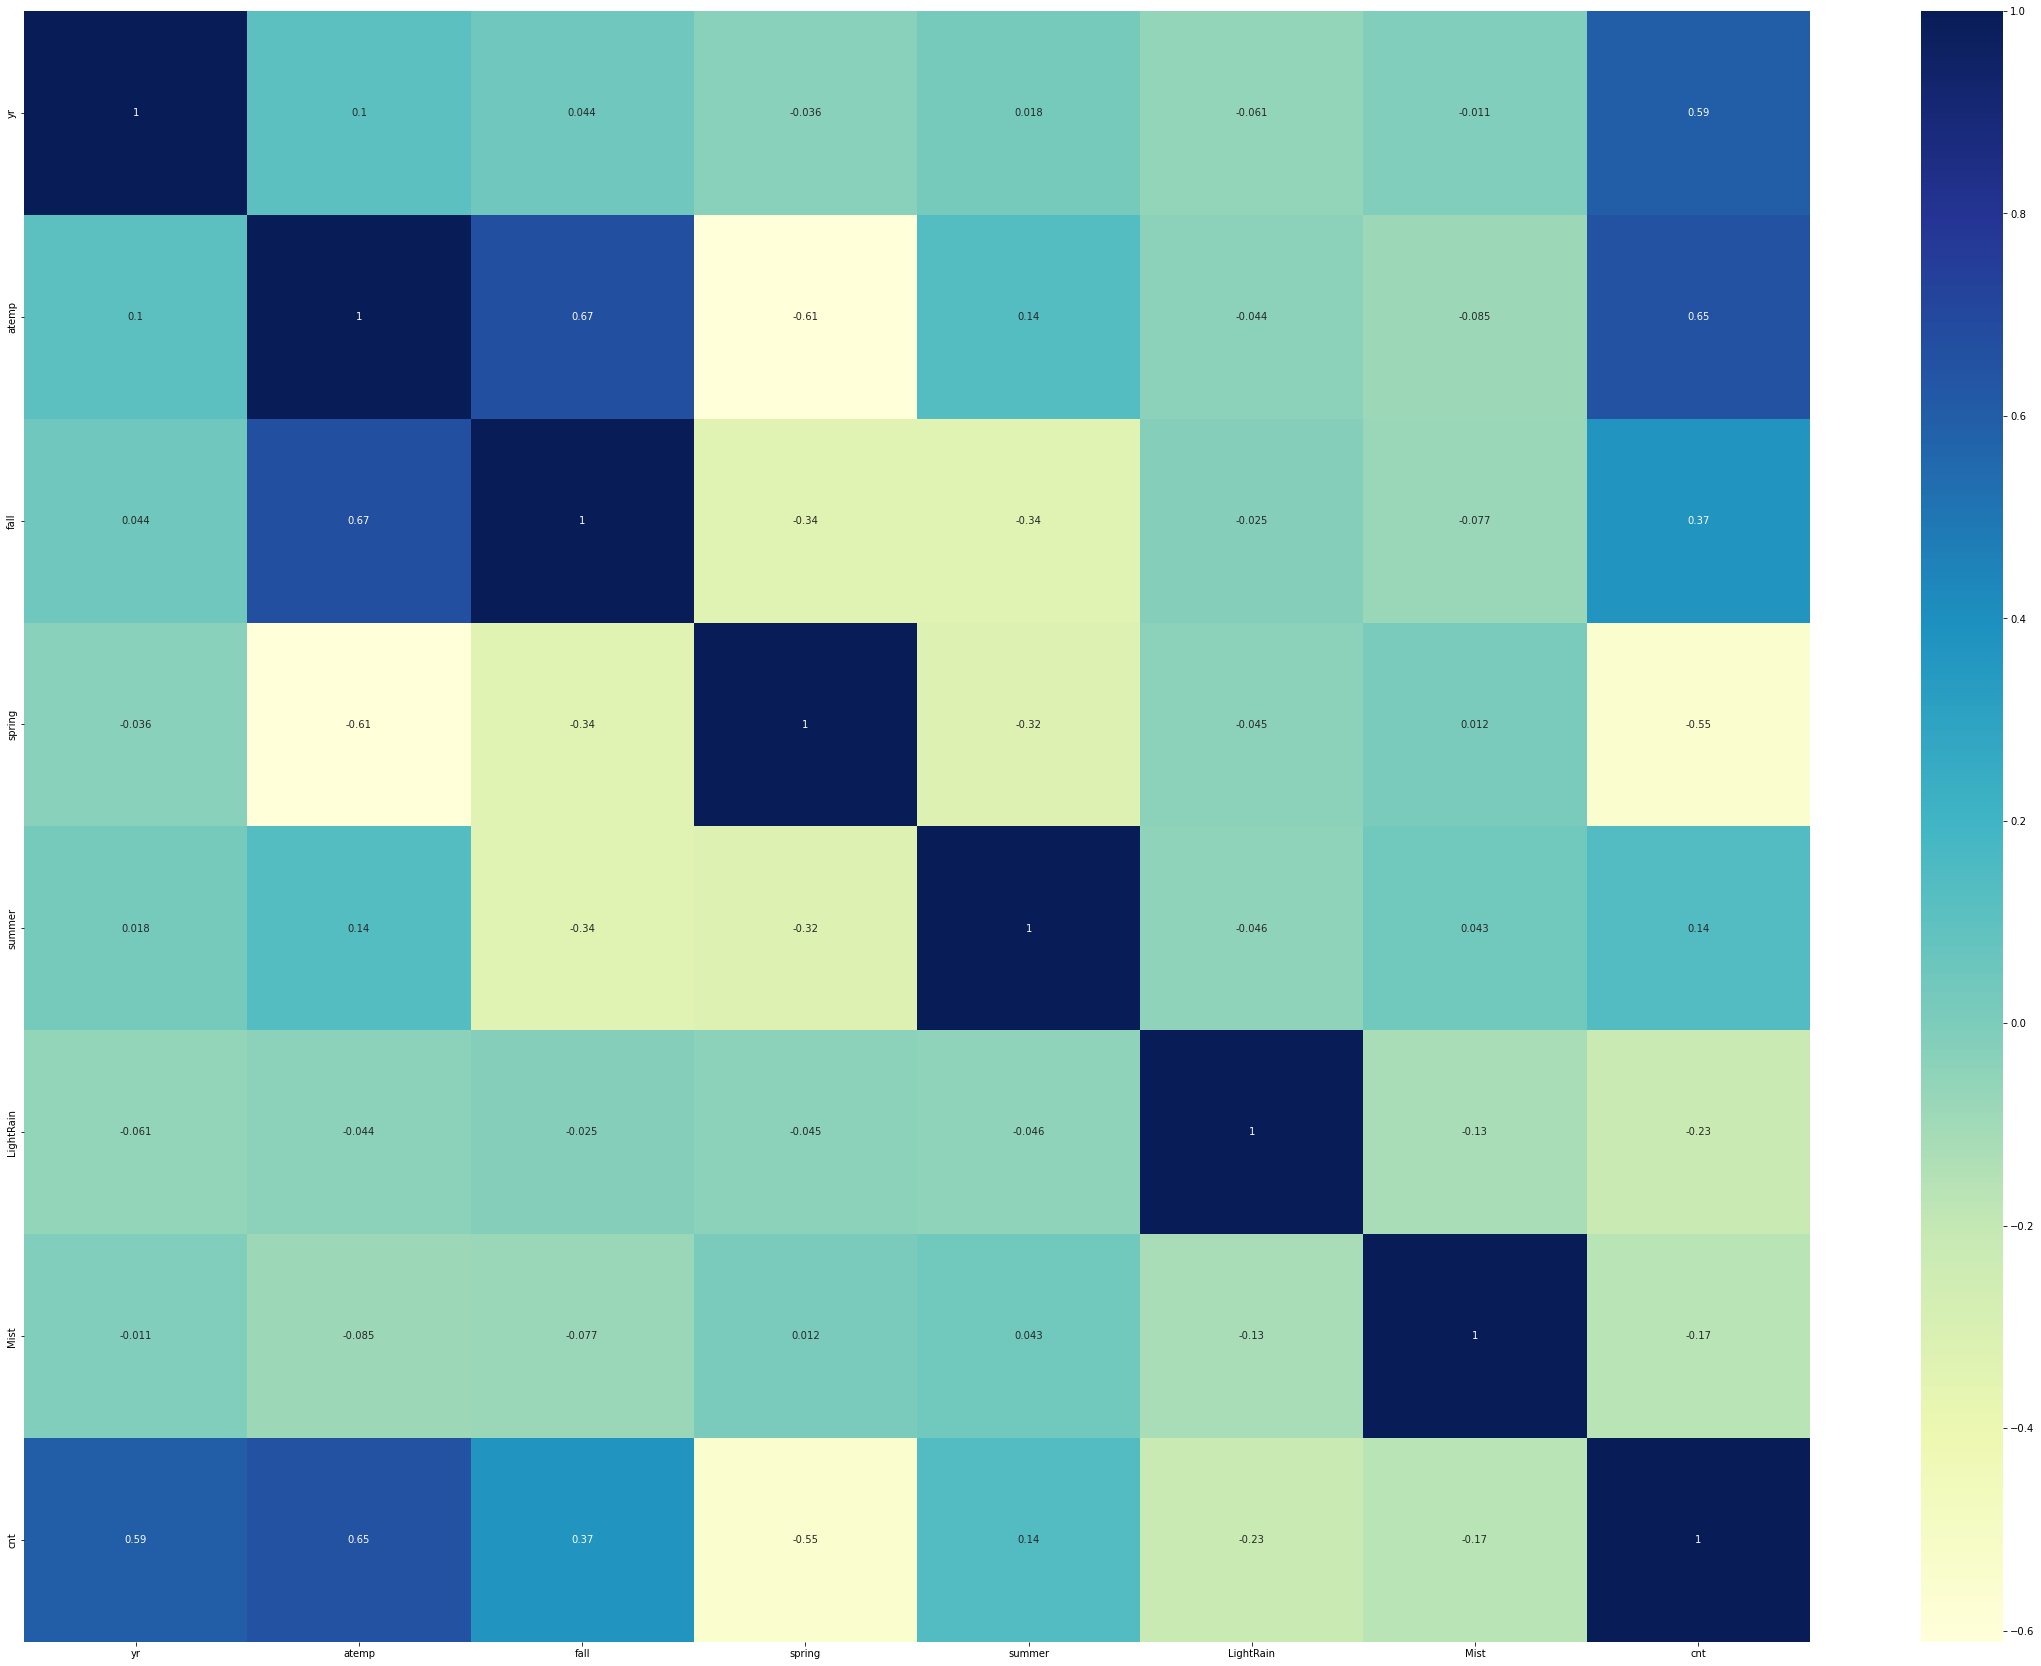

In [910]:
# Plotting a heatmap
corr_cols = ['yr', 'atemp', 'fall', 'spring', 'summer', 'LightRain', 'Mist', 'cnt']
plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

# Training the model with all the chosen variables

In [911]:
y_train = df_train.pop('cnt')
X_train = df_train

In [914]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          9.04e-174
Time:                        12:42:21   Log-Likelihood:                 455.98
No. Observations:                 510   AIC:                            -896.0
Df Residuals:                     502   BIC:                            -862.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2436      0.019     12.859      0.000       0.206       0.281
yr             0.2346      0.009     26.328      0.000       0.217       0.252
atemp          0.4852      0.036     13.447      0.000       0.414       0.556
fall          -0.0557      0.017     -3.319      0.001      -0.089      -0.023
spring        -0.1666      0.014    -12.056      0.000      -0.194      -0.139
summer        -0.0396      0.013     -2.947      0.003      -0.066      -0.013
LightRain     -0.2843      0.027    -10.676      0.000      -0.337      -0.232
Mist          -0.0723      0.009     -7.662      0.000      -0.091      -0.054
==============================================================================
Omnibus:                       74.109   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.378
Skew:                          -0.721   Prob(JB):                     1.38e-43
Kurtosis:                       5.685   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [915]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,atemp,6.59
2,fall,3.47
4,summer,2.28
0,yr,2.02
6,Mist,1.47
3,spring,1.39
5,LightRain,1.04


#### Since all the VIFs are within 10 and all the coefficients in the model are significant, R squared, Adjusted R squared are good, this will be ethe final model.

## Residual Analysis

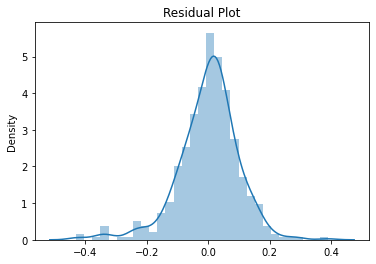

In [916]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

### The residuals seem to be normally distributed around 0. So, predictions can be made from this model

## Predictions and evaluation of the model on the test set

In [917]:
# Creating a list of numeric variables
num_vars = ['yr', 'atemp', 'cnt']

In [918]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,atemp,fall,spring,summer,LightRain,Mist,cnt
184,0.0,0.769660,1,0,0,0,1,0.692706
535,1.0,0.842587,0,0,1,0,0,0.712034
299,0.0,0.496145,0,0,0,0,1,0.303382
221,0.0,0.795343,1,0,0,0,0,0.547400
152,0.0,0.741471,0,0,1,0,0,0.569029


In [919]:
y_test = df_test.pop('cnt')
X_test = df_test

In [920]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,atemp,fall,spring,summer,LightRain,Mist
184,1.0,0.0,0.769660,1,0,0,0,1
535,1.0,1.0,0.842587,0,0,1,0,0
299,1.0,0.0,0.496145,0,0,0,0,1
221,1.0,0.0,0.795343,1,0,0,0,0
152,1.0,0.0,0.741471,0,0,1,0,0


In [921]:
y_test_pred = lr_model.predict(X_test_sm)

In [923]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

0.00936468781712831

In [922]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8041445377072696

### Since the model is performing equally well on the test set and mean squared error is low, this will be the final model.